In [6]:
import pandas as pd

In [ ]:
def inspect_df(df : pd.DataFrame):
    print(f'Shape: {df.shape}')
    null_values = df.isna().sum()
    if (null_values.sum() == 0):
        print('Null values: 0')
    else:
        print('Null values:')
        print(null_values)

In [8]:
dataset = pd.read_csv("./data/dataset.csv")
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
inspect_df(dataset)

Shape: (7043, 21)
There are no null values


In [63]:
dataset['Churn'].value_counts(normalize=True)

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

In [64]:
dataset.groupby('Contract')['MonthlyCharges'].mean()

Contract
Month-to-month    66.398490
One year          65.048608
Two year          60.770413
Name: MonthlyCharges, dtype: float64

In [65]:
dataset['tenure'] = pd.cut(dataset['tenure'], 3, labels=['low', 'average', 'high'])
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,low,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,average,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,low,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,average,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,low,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [66]:
dataset['Churn'] = dataset['Churn'].map({'Yes' : 1, 'No' : 0})
pivot = dataset.pivot_table(index=['tenure'], values=['Churn'], columns=['Contract'], aggfunc='mean', observed=True)
pivot

Churn                    
Contract Month-to-month  One year  Two year
tenure                                     
low            0.476748  0.090343  0.000000
average        0.329177  0.106178  0.021898
high           0.260234  0.129338  0.033254

In [67]:
cols = ['OnlineBackup', 'OnlineSecurity', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in cols:
    dataset[col] = dataset[col].map({'Yes' : 1, 'No' : 0, 'No internet service' : 0})
print(dataset[(dataset['OnlineBackup'] == 0) & (dataset['OnlineSecurity'] == 0) & (dataset['DeviceProtection'] == 0) & (dataset['TechSupport'] == 0) & (dataset['StreamingTV'] == 0) & (dataset['StreamingMovies'] == 0)]['Churn'].mean())
print(dataset[(dataset['OnlineBackup'] == 1) | (dataset['OnlineSecurity'] == 1) | (dataset['DeviceProtection'] == 1) | (dataset['TechSupport'] == 1) | (dataset['StreamingTV'] == 1) | (dataset['StreamingMovies'] == 1)]['Churn'].mean())

0.21406038756196485
0.28897180762852404


In [68]:
dataset['ServiceCount'] = dataset[cols].sum(1)
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,ServiceCount
0,7590-VHVEG,Female,0,Yes,No,low,No,No phone service,DSL,0,...,0,0,0,Month-to-month,Yes,Electronic check,29.85,29.85,0,1
1,5575-GNVDE,Male,0,No,No,average,Yes,No,DSL,1,...,0,0,0,One year,No,Mailed check,56.95,1889.5,0,2
2,3668-QPYBK,Male,0,No,No,low,Yes,No,DSL,1,...,0,0,0,Month-to-month,Yes,Mailed check,53.85,108.15,1,2
3,7795-CFOCW,Male,0,No,No,average,No,No phone service,DSL,1,...,1,0,0,One year,No,Bank transfer (automatic),42.30,1840.75,0,3
4,9237-HQITU,Female,0,No,No,low,Yes,No,Fiber optic,0,...,0,0,0,Month-to-month,Yes,Electronic check,70.70,151.65,1,0


<Axes: xlabel='ServiceCount'>

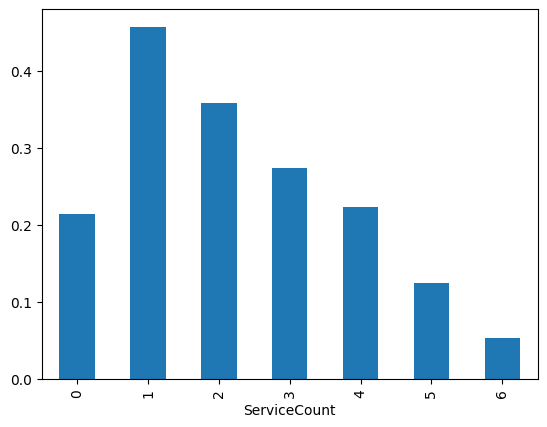

In [69]:
dataset.groupby('ServiceCount')['Churn'].mean().plot.bar()